<class 'numpy.ndarray'>
Degree 1: MSE = 0.17126666109542008, R2 = -0.8899598387352736
Degree 2: MSE = 0.12394481714009953, R2 = -0.3677543843962967
Degree 3: MSE = 0.1239606888676832, R2 = -0.36792953189734945
Degree 4: MSE = 0.09754234390825386, R2 = -0.07639812315833083
Degree 5: MSE = 0.0975162602830124, R2 = -0.07611028544467602
Degree 6: MSE = 0.08831331807013518, R2 = 0.02544591393057183
Degree 7: MSE = 0.08823557741071195, R2 = 0.026303796738626595
Degree 8: MSE = 0.08013017939579967, R2 = 0.1157483893240685
Degree 9: MSE = 0.08007644751275876, R2 = 0.11634133076612985
Degree 10: MSE = 0.07746586837139748, R2 = 0.14514956291975356
Degree 11: MSE = 0.07740680754253008, R2 = 0.14580131028195376
Degree 12: MSE = 0.07656869914648429, R2 = 0.1550499941700041
Degree 13: MSE = 0.0765801611847282, R2 = 0.1549235084207492
Degree 14: MSE = 0.07409215920905413, R2 = 0.18237907848116053
Degree 15: MSE = 0.07408937715574511, R2 = 0.18240977896302668


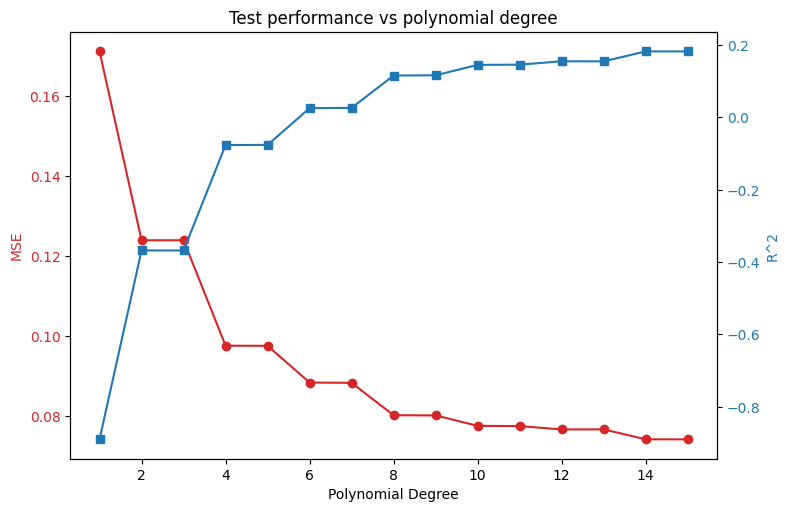

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from OLS import OLS_parameters 
from polynomial_features import polynomial_features

def f(x): 
    return 1/(1+25*x**2)

x = np.linspace(-1,1,500)
y = f(x)

print(type(y))

polymax = 15
mse_list = []
r2_list = []

for i in range(1, polymax+1):
    
    X = polynomial_features(x, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6114)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    beta = OLS_parameters(X_train_scaled, y_train)

    mse = mean_squared_error(y_test, X_test_scaled @ beta)
    
    r2 = r2_score(y_test, X_test_scaled @ beta)

    mse_list.append(mse)
    r2_list.append(r2)
    
    print(f"Degree {i}: MSE = {mse}, R2 = {r2}")


# --- Plotting ---
degrees = np.arange(1, polymax+1)

fig, ax1 = plt.subplots(figsize=(8,5))

# MSE on left axis
color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE', color=color)
ax1.plot(degrees, mse_list, 'o-', color=color, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_yscale('log')   # log scale useful for error

# R^2 on right axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R^2', color=color)
ax2.plot(degrees, r2_list, 's-', color=color, label='R^2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Test performance vs polynomial degree")
plt.show()

